In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.ticker import MaxNLocator
import pickle
import os

# Plotting params

In [2]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["Times New Roman"],  # Times for publication
    "font.size": 10,                    # Base font size
    "axes.labelsize": 18,              # Axis label font size
    "axes.labelweight": "bold",         # Bold axis labels
    "font.weight": "bold",          # Bold font for all text
    "axes.titlesize": 13,              # Axis title (not fig title)
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "legend.fontsize": 18,              # Legend font size

    "figure.dpi": 300,                 # Display resolution
    "savefig.dpi": 300,                # Save resolution
    "figure.figsize": (3.25, 2.6),     # For 0.5\textwidth plot
    "figure.constrained_layout.use": True,  # Better spacing than tight_layout

    "axes.linewidth": 0.8,             # Thin but clear axes lines
    "lines.linewidth": 1.2,
    "lines.markersize": 5,

    "axes.spines.top": False,
    "axes.spines.right": False,

    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "xtick.minor.size": 2,
    "ytick.minor.size": 2,

    "legend.frameon": False,
    "legend.handlelength": 2.0,        # Slightly longer legend lines
    "legend.handletextpad": 0.5,

    "pdf.fonttype": 42,                # Embed editable fonts in PDF
    "ps.fonttype": 42
})


folder_name_png = 'PLOTS_ROSSLER_DYNAMICS_PNG'
folder_name_svg = 'PLOTS_ROSSLER_DYNAMICS_SVG'
save_fig = False
# Check if folder already exists
# assert not os.path.exists(folder_name), f"AssertionError: Folder '{folder_name}' already exists!"


# External Current plots

## Synchrony and Entropy

In [3]:
# reading pickle file 
with open("DATA\I_ext_APC_Entropy_phase_sync.pkl", "rb") as file:
    loaded_data = pickle.load(file)

In [4]:
I_ext_arr = loaded_data['Iext']
phase_sync = loaded_data['PHASE_SYNC']
entropy = loaded_data['ENTROPY']
print(I_ext_arr)

[0.   0.25 0.5  0.75 1.   1.25 1.5  1.75]


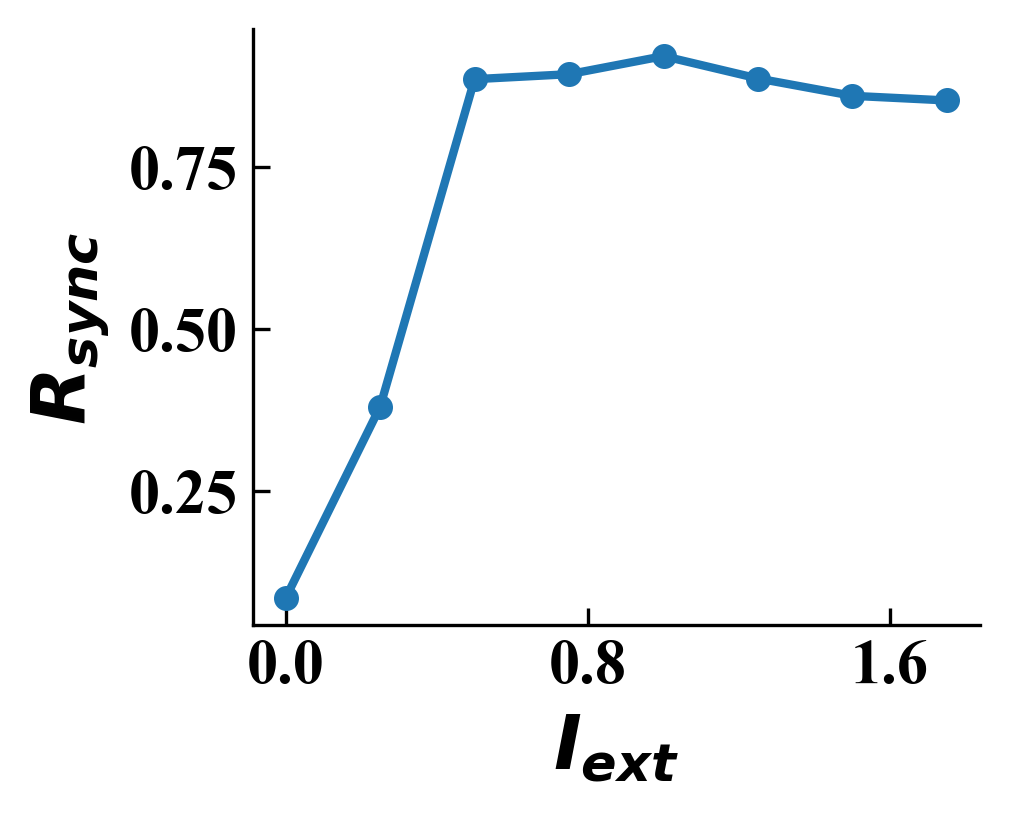

In [6]:
plt.plot(I_ext_arr, phase_sync, color='tab:blue', markersize=5, linewidth=2, marker = 'o')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=3)) 
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
plt.xlabel('$I_{ext}$')
plt.ylabel('$R_{sync}$')
if save_fig:
    plt.savefig(os.path.join(folder_name_png, 'I_ext_vs_phase_synchrony.png'), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(folder_name_svg, 'I_ext_vs_phase_synchrony.svg'), dpi=300, bbox_inches='tight')
plt.show()

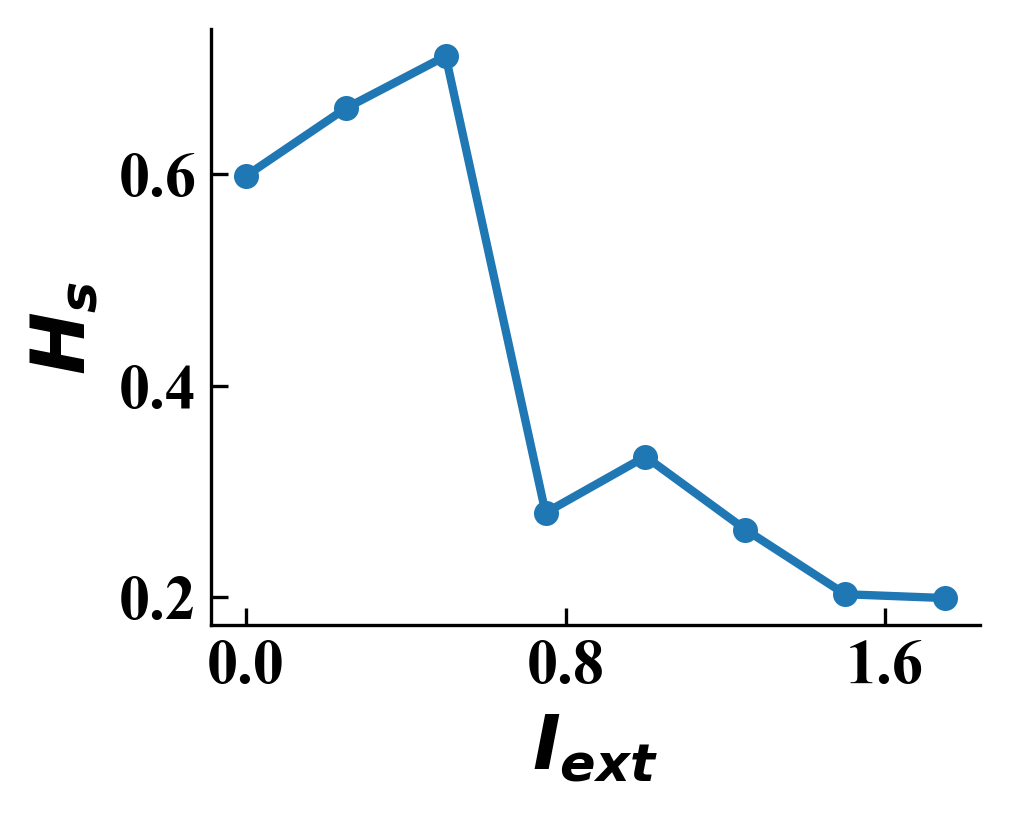

In [39]:
# plotting entropy
plt.plot(I_ext_arr, entropy, color='tab:blue', markersize=5, linewidth=2, marker = 'o')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=3)) 
ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
plt.xlabel('$I_{ext}$')
plt.ylabel('$H_{s}$')
if save_fig:
    plt.savefig(os.path.join(folder_name_png, 'I_ext_vs_entropy.png'), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(folder_name_svg, 'I_ext_vs_entropy.svg'), dpi=300, bbox_inches='tight')
plt.show()

## Bifurcation

In [23]:
# Load the pickle file
with open("data\I_ext_bifurcation.pkl", "rb") as file:
    loaded_data = pickle.load(file)

print("Loaded Data:", loaded_data.keys())

Loaded Data: dict_keys([0.0, 0.0036072144288577155, 0.007214428857715431, 0.010821643286573146, 0.014428857715430862, 0.018036072144288578, 0.021643286573146292, 0.02525050100200401, 0.028857715430861724, 0.03246492985971944, 0.036072144288577156, 0.03967935871743487, 0.043286573146292584, 0.0468937875751503, 0.05050100200400802, 0.05410821643286573, 0.05771543086172345, 0.061322645290581165, 0.06492985971943888, 0.0685370741482966, 0.07214428857715431, 0.07575150300601202, 0.07935871743486975, 0.08296593186372746, 0.08657314629258517, 0.09018036072144289, 0.0937875751503006, 0.09739478957915831, 0.10100200400801604, 0.10460921843687375, 0.10821643286573146, 0.11182364729458918, 0.1154308617234469, 0.1190380761523046, 0.12264529058116233, 0.12625250501002006, 0.12985971943887775, 0.13346693386773548, 0.1370741482965932, 0.1406813627254509, 0.14428857715430862, 0.14789579158316635, 0.15150300601202404, 0.15511022044088177, 0.1587174348697395, 0.1623246492985972, 0.16593186372745491, 0.1

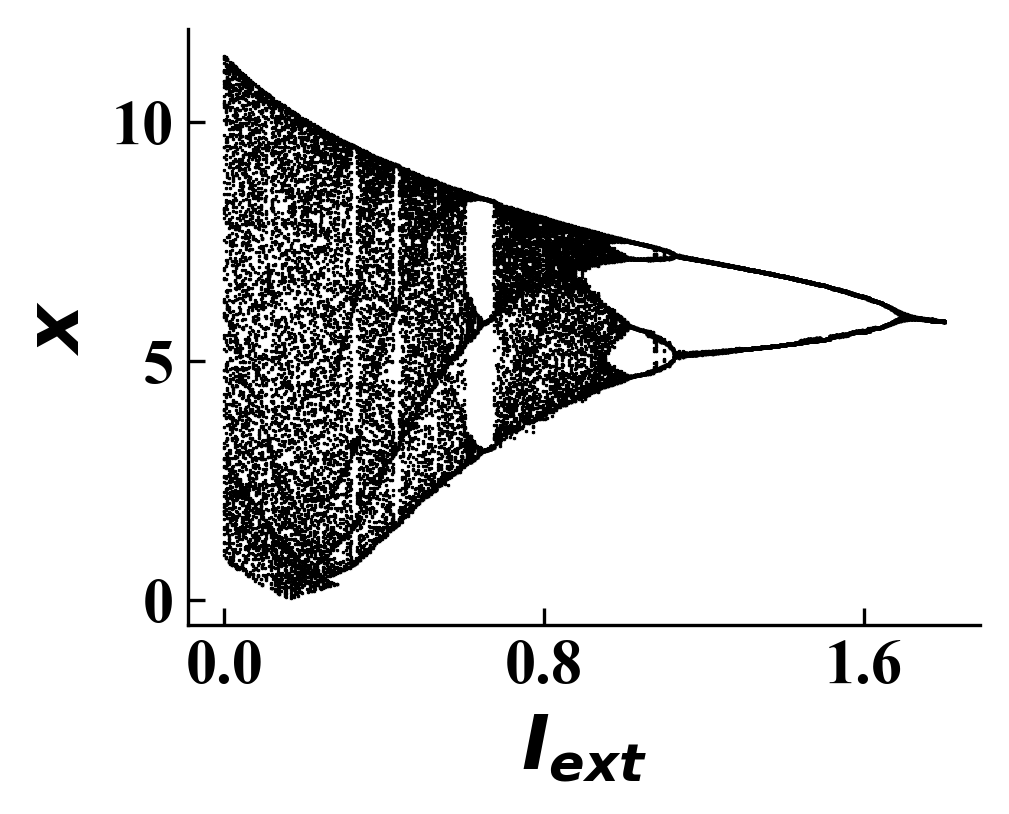

In [25]:
I_ext_arr = np.array(list(loaded_data.keys())) 
bifurcation_data = loaded_data
for I_ext in I_ext_arr:
    x_peak_vals = bifurcation_data[I_ext]
    x_ax = I_ext * np.ones(x_peak_vals.shape[0])
    plt.plot(x_ax,x_peak_vals,'*', color = 'black', markersize = 0.25)
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=3)) 
ax.yaxis.set_major_locator(MaxNLocator(nbins=3))

plt.xlabel('$I_{ext}$')
plt.ylabel('$x$')
if save_fig:
    plt.savefig(os.path.join(folder_name_png, 'I_ext_bifurcation.png'), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(folder_name_svg, 'I_ext_bifurcation.svg'), dpi=300, bbox_inches='tight')
plt.show()

# K param

In [40]:
# reading pickle file 
with open("DATA\k_APC_Entropy_phase_sync.pkl", "rb") as file:
    loaded_data = pickle.load(file)

In [41]:
k = loaded_data['k']
phase_sync = loaded_data['PHASE_SYNC']
entropy = loaded_data['ENTROPY']
k

array([0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.65])

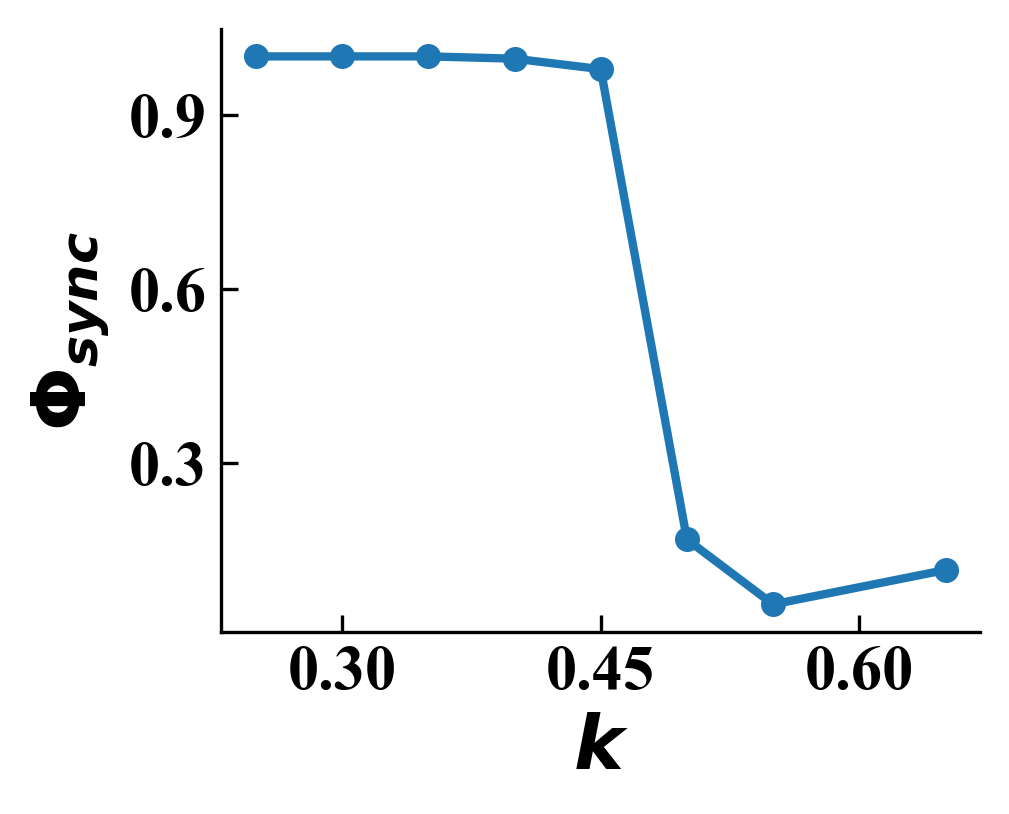

In [42]:
plt.plot(k, phase_sync, color='tab:blue', markersize=5, linewidth=2, marker = 'o')
plt.xlabel('$k$')
plt.ylabel('$\Phi_{sync}$')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=3)) 
ax.yaxis.set_major_locator(MaxNLocator(nbins=4))
if save_fig:
    plt.savefig(os.path.join(folder_name_png, 'k_vs_phase_synchrony.png'), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(folder_name_svg, 'k_vs_phase_synchrony.svg'), dpi=300, bbox_inches='tight')
plt.show()

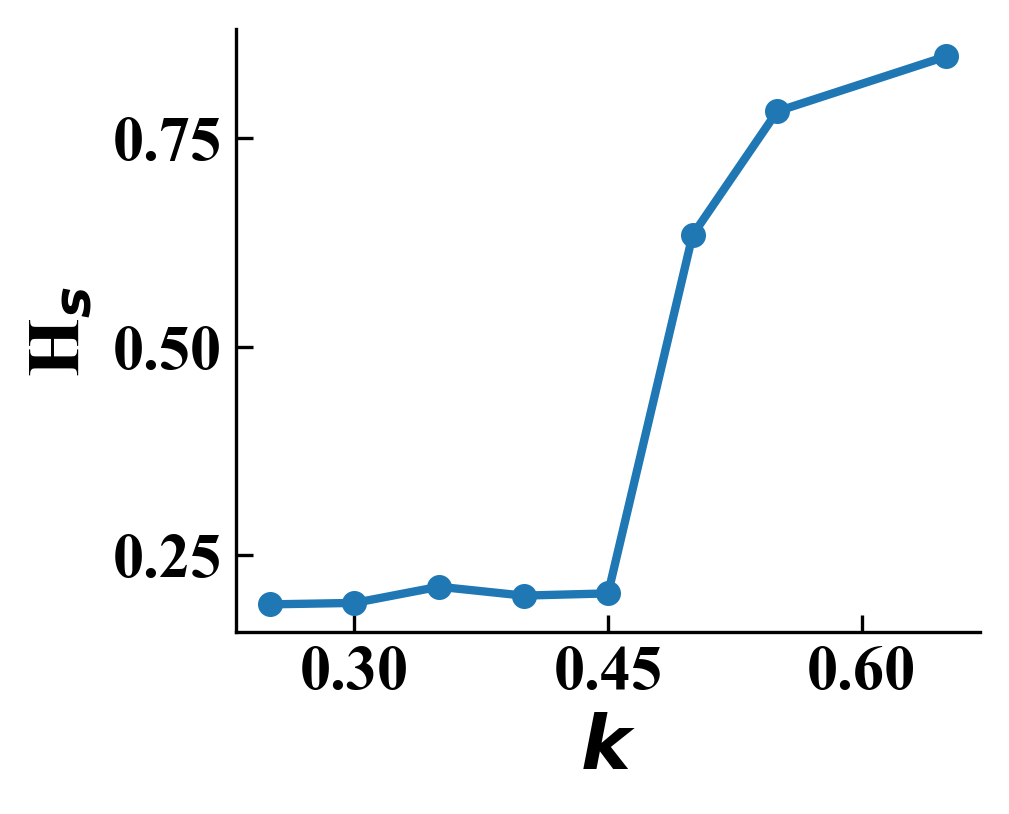

In [43]:
# Plotting entropy wrt k
plt.plot(k, entropy, color='tab:blue', markersize=5, linewidth=2, marker = 'o')
plt.xlabel('$k$')   
plt.ylabel('H$_{s}$')
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=3)) 
ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
if save_fig:
    plt.savefig(os.path.join(folder_name_png, 'k_vs_entropy.png'), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(folder_name_svg, 'k_vs_entropy.svg'), dpi=300, bbox_inches='tight')
plt.show()

## Bifurcation

In [30]:
# Load the pickle file
with open("DATA\k_bifurcation.pkl", "rb") as file:
    loaded_data = pickle.load(file)['bifurcation']

print("Loaded Data:", loaded_data.keys())

Loaded Data: dict_keys([0.25, 0.2508016032064128, 0.25160320641282563, 0.2524048096192385, 0.2532064128256513, 0.25400801603206413, 0.25480961923847695, 0.25561122244488976, 0.2564128256513026, 0.25721442885771545, 0.25801603206412826, 0.2588176352705411, 0.2596192384769539, 0.2604208416833667, 0.2612224448897796, 0.2620240480961924, 0.2628256513026052, 0.263627254509018, 0.26442885771543084, 0.2652304609218437, 0.26603206412825653, 0.26683366733466934, 0.26763527054108216, 0.268436873747495, 0.2692384769539078, 0.27004008016032066, 0.2708416833667335, 0.2716432865731463, 0.2724448897795591, 0.2732464929859719, 0.2740480961923848, 0.2748496993987976, 0.2756513026052104, 0.27645290581162324, 0.27725450901803605, 0.2780561122244489, 0.27885771543086174, 0.27965931863727456, 0.28046092184368737, 0.2812625250501002, 0.282064128256513, 0.2828657314629259, 0.2836673346693387, 0.2844689378757515, 0.2852705410821643, 0.28607214428857713, 0.28687374749498995, 0.2876753507014028, 0.2884769539078

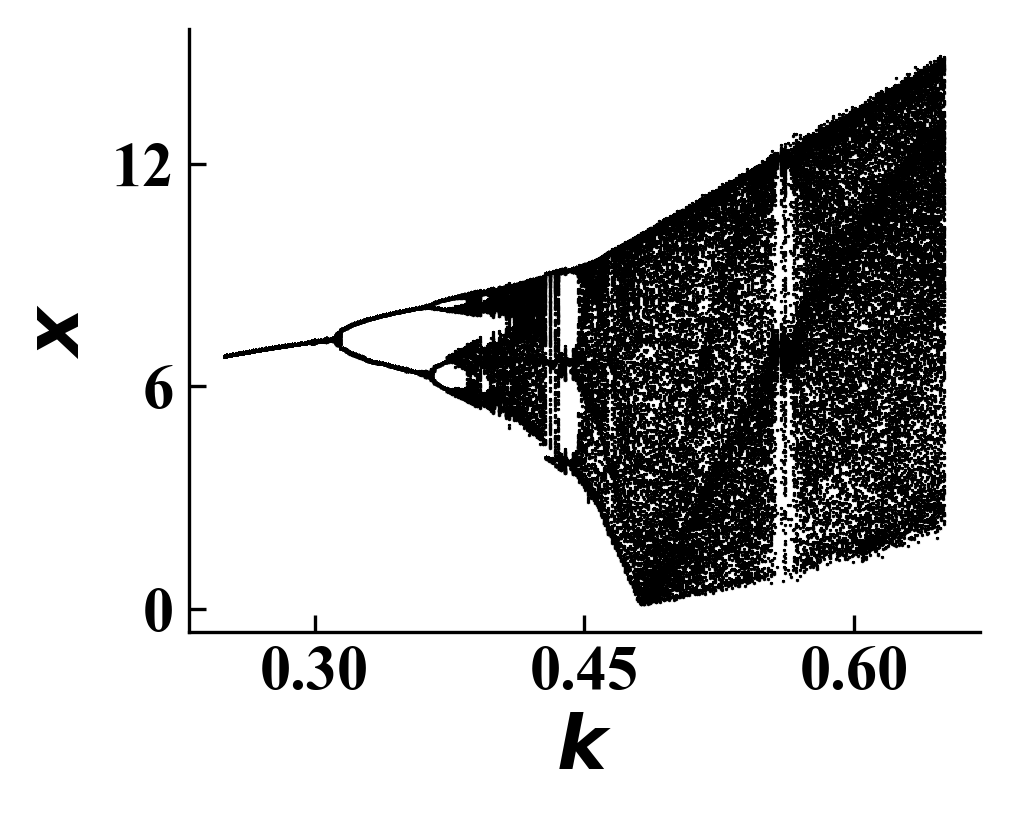

In [34]:
k_arr = np.array(list(loaded_data.keys())) 
bifurcation_data = loaded_data
for k in k_arr:
    x_peak_vals = bifurcation_data[k]
    x_ax = k * np.ones(x_peak_vals.shape[0])
    plt.plot(x_ax,x_peak_vals,'*', color = 'black', markersize = 0.2)
ax = plt.gca()
ax.xaxis.set_major_locator(MaxNLocator(nbins=3)) 
ax.yaxis.set_major_locator(MaxNLocator(nbins=3))
plt.xlabel('$k$')
plt.ylabel('$x$')
if save_fig:
    plt.savefig(os.path.join(folder_name_png, 'k_bifurcation.png'), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(folder_name_svg, 'k_bifurcation.svg'), dpi=300, bbox_inches='tight')
plt.show()

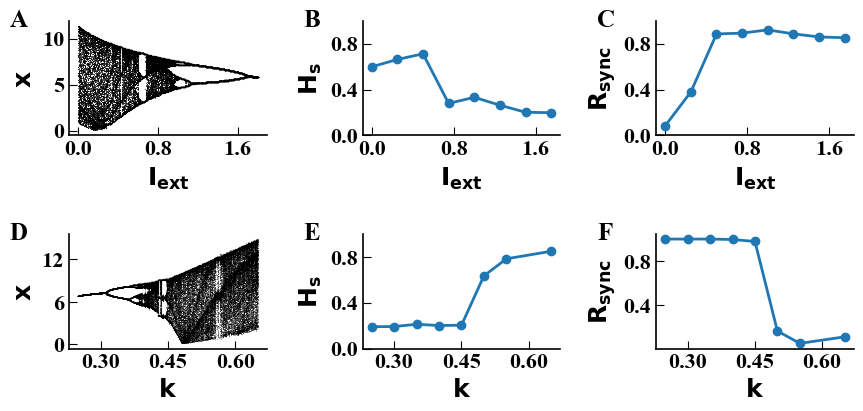

In [71]:
# ...existing code...
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import pickle
import os

# Load data for I_ext plots
with open("DATA/I_ext_APC_Entropy_phase_sync.pkl", "rb") as file:
    data_Iext = pickle.load(file)
I_ext_arr = data_Iext['Iext']
phase_sync_Iext = data_Iext['PHASE_SYNC']
entropy_Iext = data_Iext['ENTROPY']

with open("data/I_ext_bifurcation.pkl", "rb") as file:
    bif_Iext = pickle.load(file)
I_ext_bif_arr = np.array(list(bif_Iext.keys()))

# Load data for k plots
with open("DATA/k_APC_Entropy_phase_sync.pkl", "rb") as file:
    data_k = pickle.load(file)
k_arr = data_k['k']
phase_sync_k = data_k['PHASE_SYNC']
entropy_k = data_k['ENTROPY']

with open("DATA/k_bifurcation.pkl", "rb") as file:
    bif_k = pickle.load(file)['bifurcation']
k_bif_arr = np.array(list(bif_k.keys()))

# Scientific plotting style
plt.rcParams.update({
    
    "font.family": "serif",
    "font.serif": ["Times New Roman"],
    "font.size": 18,
    "axes.labelsize": 22,
    "axes.labelweight": "bold",
    "axes.titlesize": 20,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 18,
    "font.weight": "bold", 
    "axes.linewidth": 1.2,
    "lines.linewidth": 2,
    "lines.markersize": 7,
    "axes.spines.top": False,
    "axes.spines.right": False,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "xtick.minor.size": 3,
    "ytick.minor.size": 3,
    "legend.frameon": False,
    "pdf.fonttype": 42,
    "ps.fonttype": 42
})

fig, axs = plt.subplots(2, 3, figsize=(9, 4.5), constrained_layout= False,)

# Row 1: I_ext plots
axs[0, 2].plot(I_ext_arr, phase_sync_Iext, color='tab:blue', marker='o', linewidth=2, markersize = 6)
axs[0, 2].set_xlabel(r'$\mathbf{I_{ext}}$', fontsize=18, fontweight='bold')
axs[0, 2].set_ylabel(r'$\mathbf{R_{sync}}$', fontsize=18, fontweight='bold')
axs[0, 2].tick_params(axis='both', labelsize=16)
axs[0, 2].xaxis.set_major_locator(MaxNLocator(nbins=3))
axs[0, 2].yaxis.set_major_locator(MaxNLocator(nbins=3))
axs[0, 2].set_ylim([0, 1])
# axs[0, 2].set_title(r'$\mathbf{I_{ext}}$ vs $\mathbf{R_{sync}}$', fontsize=20, fontweight='bold')

axs[0, 1].plot(I_ext_arr, entropy_Iext, color='tab:blue', marker='o', linewidth=2, markersize = 6)
axs[0, 1].set_xlabel(r'$\mathbf{I_{ext}}$', fontsize=18, fontweight='bold')
axs[0, 1].set_ylabel(r'$\mathbf{H_{s}}$', fontsize=18, fontweight='bold')
axs[0, 1].tick_params(axis='both', labelsize=16)
axs[0, 1].xaxis.set_major_locator(MaxNLocator(nbins=3))
axs[0, 1].yaxis.set_major_locator(MaxNLocator(nbins=3))
axs[0, 1].set_ylim([0, 1])
# axs[0, 1].set_title(r'$\mathbf{I_{ext}}$ vs $\mathbf{H_{s}}$', fontsize=20, fontweight='bold')

for I_ext in I_ext_bif_arr:
    x_peak_vals = bif_Iext[I_ext]
    x_ax = I_ext * np.ones(x_peak_vals.shape[0])
    axs[0, 0].plot(x_ax, x_peak_vals, '*', color='black', markersize=0.1)
axs[0, 0].set_xlabel(r'$\mathbf{I_{ext}}$', fontsize=18, fontweight='bold')
axs[0, 0].set_ylabel(r'$\mathbf{x}$', fontsize=18, fontweight='bold')
axs[0, 0].tick_params(axis='both', labelsize=16)
axs[0, 0].xaxis.set_major_locator(MaxNLocator(nbins=3))
axs[0, 0].yaxis.set_major_locator(MaxNLocator(nbins=3))
# axs[0, 2].set_title(r'$\mathbf{I_{ext}}$ Bifurcation', fontsize=20, fontweight='bold')

# Row 2: k plots
axs[1, 2].plot(k_arr, phase_sync_k, color='tab:blue', marker='o', linewidth=2, markersize = 6)
axs[1, 2].set_xlabel(r'$\mathbf{k}$', fontsize=18, fontweight='bold')
axs[1, 2].set_ylabel(r'$\mathbf{R_{sync}}$', fontsize=18, fontweight='bold')
axs[1, 2].tick_params(axis='both', labelsize=16)
axs[1, 2].xaxis.set_major_locator(MaxNLocator(nbins=3))
axs[1, 2].yaxis.set_major_locator(MaxNLocator(nbins=3))
# axs[1, 2].set_ylim([0, 1])
# axs[1, 0].set_title(r'$\mathbf{k}$ vs $\mathbf{\Phi_{sync}}$', fontsize=20, fontweight='bold')

axs[1, 1].plot(k_arr, entropy_k, color='tab:blue', marker='o', linewidth=2, markersize = 6)
axs[1, 1].set_xlabel(r'$\mathbf{k}$', fontsize=18, fontweight='bold')
axs[1, 1].set_ylabel(r'$\mathbf{H_{s}}$', fontsize=18, fontweight='bold')
axs[1, 1].tick_params(axis='both', labelsize=16)
axs[1, 1].xaxis.set_major_locator(MaxNLocator(nbins=3))
axs[1, 1].yaxis.set_major_locator(MaxNLocator(nbins=3))
axs[1, 1].set_ylim([0, 1])
# axs[1, 1].set_title(r'$\mathbf{k}$ vs $\mathbf{H_{s}}$', fontsize=20, fontweight='bold')

for k in k_bif_arr:
    x_peak_vals = bif_k[k]
    x_ax = k * np.ones(x_peak_vals.shape[0])
    axs[1, 0].plot(x_ax, x_peak_vals, '*', color='black', markersize=0.05)
axs[1, 0].set_xlabel(r'$\mathbf{k}$', fontsize=18, fontweight='bold')
axs[1, 0].set_ylabel(r'$\mathbf{x}$', fontsize=18, fontweight='bold')
axs[1, 0].tick_params(axis='both', labelsize=16)
axs[1, 0].xaxis.set_major_locator(MaxNLocator(nbins=3))
axs[1, 0].yaxis.set_major_locator(MaxNLocator(nbins=3))
# axs[1, 2].set_title(r'$\mathbf{k}$ Bifurcation', fontsize=20, fontweight='bold')
# plt.subplots_adjust(wspace=0.2, hspace=0.4)

# ...existing code...

# Add subplot labels
labels = ['A', 'B', 'C', 'D', 'E', 'F']
for idx, ax in enumerate(axs.flat):
    ax.text(-0.3, 1.1, labels[idx], transform=ax.transAxes,
            fontsize=18, fontweight='bold', va='top', ha='left')

# ...rest of your plotting code...
plt.tight_layout()
plt.savefig('dynamics_all.png', dpi=300, bbox_inches='tight')

plt.show()
# ...existing code...